<a href="https://colab.research.google.com/github/varsha2509/Springboard-DS/blob/master/Capstone2/Colab/DeepSat6_CNN_Model_Comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Install Packages and Mount Google Drive
import pandas as pd
import numpy as np
import cv2
import h5py
import csv
from scipy.io import loadmat
import matplotlib.pyplot as plt 
from google.colab import drive
import os
from os import listdir

from numpy import asarray

from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

from PIL import Image
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

import tensorflow as tf
from tensorflow.keras import layers, models
from keras.preprocessing import image
from tensorflow import keras

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import TensorBoard
from keras.layers import Conv2D, MaxPool2D, Dense, Dropout, Flatten, ZeroPadding2D
from keras.models import Sequential, Model
from keras.applications import vgg16
from keras import backend as K
from keras import models    
from keras.models import load_model
from keras.models import model_from_json
from sklearn.metrics import balanced_accuracy_score

from matplotlib.colors import ListedColormap


from multiprocessing.pool import ThreadPool



from keras.callbacks import EarlyStopping, ModelCheckpoint

# load vgg model
from keras.applications.vgg16 import VGG16


from skimage.io import imread

from glob import glob

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Springboard/Capstone Projects/Capstone-2/DeepSat-6-Dataset/"

#Mount the drive to colab notebook
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:
#Change the current working directory
%cd /content/gdrive/My\ Drive/Springboard/Capstone\ Projects/Capstone-2/DeepSat-6-Dataset/


/content/gdrive/My Drive/Springboard/Capstone Projects/Capstone-2/DeepSat-6-Dataset


#Loading weights for the different models

##  Baseline CNN model

In [ ]:
# load json and create model
json_file = open('cnn-baseline.json', 'r')
baseline_cnn_json = json_file.read()
json_file.close()
baseline_cnn = model_from_json(baseline_cnn_json)

# load weights into new model
baseline_cnn.load_weights("cnn-baseline.h5")
print("Loaded CNN baseline model from disk")
 
# # evaluate loaded model on test data
# loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
# score = loaded_model.evaluate(X, Y, verbose=0)
# print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded CNN baseline model from disk


## TL-1 model - Transfer Learning with VGG6 and Padding input image

In [ ]:
# load json and create model
json_file = open('vgg-base-padding.json', 'r')
tl_1_json = json_file.read()
json_file.close()
tl_1 = model_from_json(tl_1_json)

# load weights into new model
tl_1.load_weights("vgg-base-padding.h5")
print("Loaded TL-1 model from disk")
 
# # evaluate loaded model on test data
# loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
# score = loaded_model.evaluate(X, Y, verbose=0)
# print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded TL-1 model from disk


## TL-2 model - Transfer Learning with VGG6 and Upsampling input image

In [ ]:
# load json and create model
json_file = open('vgg-base-upsampling.json', 'r')
tl_2_json = json_file.read()
json_file.close()
tl_2 = model_from_json(tl_2_json)

# load weights into new model
tl_2.load_weights("vgg-base-upsampling.h5")
print("Loaded TL-2 model from disk")
 
# # evaluate loaded model on test data
# loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
# score = loaded_model.evaluate(X, Y, verbose=0)
# print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded TL-2 model from disk


## TL-3 model - Transfer Learning with VGG16 with fine tuning and padding input image

In [ ]:
# load json and create model
json_file = open('vgg-finetuning-padding.json', 'r')
tl_3_json = json_file.read()
json_file.close()
tl_3 = model_from_json(tl_3_json)

# load weights into new model
tl_3.load_weights("vgg-finetuning-padding.h5")
print("Loaded TL-3 model from disk")
 
# # evaluate loaded model on test data
# loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
# score = loaded_model.evaluate(X, Y, verbose=0)
# print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

Loaded TL-3 model from disk


## Bar graph comparing the balanced accuracy score for each model





In [ ]:
## Create a dataframe with balanced accuracy scores for different models
model_comparison_scores = pd.DataFrame()
model_comparison_scores['scores'] = [89.69, 94.04, 92.13, 90.00, 95.12]
model_comparison_scores['names'] = ['Baseline Random Forest', 'Baseline CNN', 'Transfer Learning with Vgg16 (Padding Input Image)', 'Transfer Learning with Vgg16 (Upsampling Input Image)', 'Transfer Learning with Vgg16 and Fine Tuning']
model_comparison_scores['model'] = ['brf', 'b_cnn', 'tl_1', 'tl_2', 'tl_3']

<Figure size 576x576 with 0 Axes>

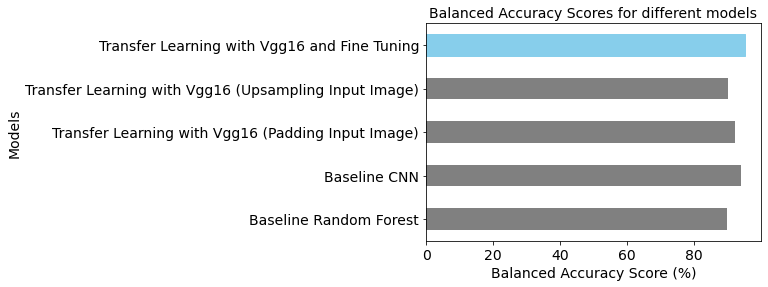

In [ ]:
plt.figure(figsize=(8, 8))
ax = model_comparison_scores.plot.barh(x='names', y='scores', color='grey')
ax.get_children()[4].set_color('skyblue')
ax.set_ylabel('Models', fontsize = 14)
ax.set_xlabel('Balanced Accuracy Score (%)', fontsize = 14)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.get_legend().remove()
ax.set_title('Balanced Accuracy Scores for different models', fontsize = 14)

plt.show()

## Bar graph comparing the F1 score for Transfer learning Vgg16 and baseline CNN



In [ ]:
## Bar graph comparing the balanced accuracy score for each model
f1_comparison_scores = pd.DataFrame()
f1_comparison_scores['classes'] = ['Barren Land', 'Building', 'Grassland','Road','Trees','Water']
f1_comparison_scores['b_cnn'] = [0.93,0.96,0.90,0.82,0.97,1.00]
f1_comparison_scores['tl_3'] = [0.96,0.95,0.92,0.85,0.98,1.00]




In [ ]:
f1_comparison_scores.head(6)

,classes,b_cnn,tl_3
0,Barren Land,0.93,0.96
1,Building,0.96,0.95
2,Grassland,0.90,0.92
3,Road,0.82,0.85
4,Trees,0.97,0.98
5,Water,1.00,1.00


In [ ]:
f1_comparison_scores.set_index('classes', inplace=True)

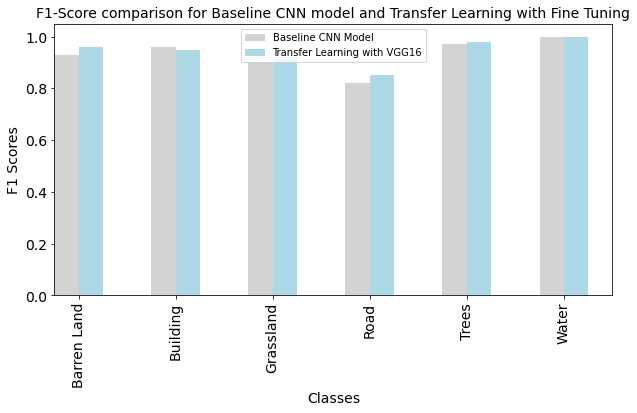

In [ ]:
fig=plt.figure(figsize=(10,5))

ax = fig.add_subplot(111) # Create matplotlib axes
#ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.25

f1_comparison_scores.b_cnn.plot(kind='bar', color='lightgrey', ax=ax, width=width, position=1, label = 'Baseline CNN Model')
f1_comparison_scores.tl_3.plot(kind='bar', color='lightblue', ax=ax, width=width, position=0, label = 'Transfer Learning with VGG16')

ax.set_xlabel('Classes', fontsize  = 14)
ax.set_ylabel('F1 Scores', fontsize  = 14)
ax.legend(loc = 'best')
ax.tick_params(axis='both', which='major', labelsize=14)

#ax2.set_ylabel('Transfer Learning with Fine Tuning')

ax.set_title('F1-Score comparison for Baseline CNN model and Transfer Learning with Fine Tuning', fontsize  = 14)

plt.show()

